<a href="https://colab.research.google.com/github/SirTee12/Hidden-Killer-on-the-road-Analysis-/blob/main/Hidden_killer_on_the_road_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reducing the number of high fatality accidents

## 📖 Background
You work for the road safety team within the department of transport and are looking into how they can reduce the number of major incidents. The safety team classes major incidents as fatal accidents involving 3+ casualties. They are trying to learn more about the characteristics of these major incidents so they can brainstorm interventions that could lower the number of deaths. They have asked for your assistance with answering a number of questions.

## 💾 The data
The reporting department have been collecting data on every accident that is reported. They've included this along with a lookup file for 2020's accidents. The lookup file further explain what values ineach column indicate.

*Published by the department for transport. https://data.gov.uk/dataset/road-accidents-safety-data* 
*Contains public sector information licensed under the Open Government Licence v3.0.*

> There are 27 columns in the accidents data and they are
1.  **accident_index** : unique value for each accident. The accident_index combines the accident_year and accident_ref_no to         form 
2.  **unique ID** : It can be used to join to Vehicle and Casualty
3.  **accident_year** : year the accident occurred
4.  **accident_reference** :In year id used by the police to reference a collision. It is not unique outside of the year, use         accident index for linking to other years
5.  longitude and latitude : indicate the location of the accident
6.  accident_severity : This shows how serious the accident was. There are three categories - 
     - 1 - Fatal
     - 2 - Serious
     - 3 - Slight
7.  number_of_vehicles : Number of vehicles involved the accident
8.  number_of_casualties : Number of people injured or died from the accident
9.  date : date of the accident
10.  day_of_week : day the accident happened which is labeled 1-7 and represent sunday - staurday respectively
11. time : time of occurence. it is denoted as NaN if time is not known
12. first_road_class : describe the class of road in which the accident occurred. the following are the dneotion for the type of     road - 
      - 1 : motorway - high speed roads that link major towns and cities
      - 2 : A(M) - roads upgraded from major roads to motorway
      - 3 : A - major roads between regional towns and cities
      - 4 : B - minor roads. conect small town and villages
      - 5 : C - classified unnumbered roads
      - 6 : unclassified roads
13. first_road_number : these are numbers assighned to to various road class and they range from 1 - 9999 but their are             exceptions -
    - -1 - indicate an unknown road number
    - 0  - first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero 
14. road_type : specifies type of road. they have the following categories;
    - 1 : roundabout
    - 2 : one way street
    - 3 : dual carriage way
    - 6 : single carriage way
    - 7 : slip road
    - 9 : unknown 
    - 12 : one way street/slip road
    - -1 : data missing or out of range
15. speed_limit : 20,30,40,50,60,70 are the only valid speed limits on public highways. there are some special speed limit;
    - -1 : speed is out of range or missing
    - 99 : speed is unknown or self-reported
16. junction_detail : information of the junction the accidents occurs and they can fall in the following categories;
    - 0 : not at junction or within 20 meters
    - 1 : roundabout
    - 2 : mini roundabout
    - 3 : T or staggered juction
    - 5 : slip roads
    - 6 : cross roads
    - 7 : More than 4 arms (not roundabout)
    - 8 : private drive or entrance
    - 9 : other junction
    - 99 : unknown or self-reported (it emans juction is known or someone reported it)
    - -1 : data missing or out of range
17. **junction_control** : indicate who or what is directiong traffic at the jusction at the time the accident occurred. it           falls into the following categories;
    - 0 : nobody or nothing is present or they are within 20 meters from the junction
    - 1 : Authorised person
    - 2 : Auto-traffic signal
    - 3 : stop sign
    - 4 : Give way or uncontrolled
    - -1: data missing or out of range
    - 9 : unknown(self-reported)
18. **second_road_class** : 
      - 0 : not at junction or within 20 meters
      - 1 : motorway - high speed roads that link major towns and cities
      - 2 : A(M) - roads upgraded from major roads to motorway
      - 3 : A - major roads between regional towns and cities
      - 4 : B - minor roads. conect small town and villages
      - 5 : C - classified unnumbered roads
      - 6 : unclassified roads 
19. **second_road_number** : these are numbers assighned to to various road class and they range from 1 - 9999 but their are         exceptions -
    - -1 - indicate an unknown road number
    -  0 - first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero 
20. **pedestrian_crossing_human_control** : signifies who or what is contolling traffic at pedetrian crossing and it fall into       the following categories
      - 0 : None within 50 meters
      - 1 : controlled by school crossing patrol
      - 2 : controlled by authorized person
      - -1: data missing or out of range
      - 9 : unknown or self-reported
21. **pedestrian_crossing_physical_facilities** : indicate any physical facilities that have been made available to ease             pedestrian crossing. it has the following categories.
      - 0 : no physical crossing facilities within 50 meters
      - 1 : Zebra crossing
      - 4 : Pelican, puffin, toucan or similar non-junction pedestrian light crossing
      - 5 : Pedestrian phase at traffic signal junction
      - 7 : footbridge or subway
      - 8 : central refuge
      - -1 : data missing or out of range
      - 9 : unknown or self-reported
22. **light_conditions**:
      - 1 : daylight
      - 4 : darkness - lights lit
      - 5 : darkness - lights unlit
      - 6 : darkness - no lighting
      - 7 : darkness - lighting unknown
      - -1: data missing or out of range
23. **weather_conditions** : condtion of the weather when the accident occur. It has the following categories
      - 1 : fine no high winds
      - 2 : raining no high winds
      - 3 : snowing no high winds
      - 4 : fine + high winds
      - 5 : raining + high winds
      - 6 : snowing + high winds
      - 7 - fog or mist
      - 8 : other
      - 9 : unknown
      - -1: data missing or out of range
24. **road_surface_conditions** : The condition of road surface. It has the following categories
      - 1 : dry
      - 2 : wet or damp
      - 3 : snow
      - 4 : frost or ice
      - 5 : flood over 3cm. deep
      - 6 : oil or diesel
      - 7 : mud
      - -1: data missing or out of range
      - 9 : unkown(self-reported)
25. **special_conditions_at_site** : it has the following categories
      - 0 : none
      - 1 : auto-traffic signal - out
      - 2 : auto signal part - defective
      - 3 : road sign or marking defective or obscured
      - 4 : roadworks
      - 5 : road surface defective
      - 6 : oil or diesel
      - 7 : mud
      - -1: data missing or out of range 
      - 9 : unknown(self-reported)
26. **carriageway_hazards** : It has the following categories
      - 0 : None
      - 1 : vehicle load on the road
      - 2 : other object on the road
      - 3 : previous accident
      - 4 : dog on road
      - 5 : other animal on road
      - 6 : pedestrian in carriageway (not injured)
      - 7 : other animal in carriageway (except ridden horse)
      - -1: data missing or out of range
      - 9 : unknown(seld-reported)
27. **urban_or_rural_area** : environment where the accident happened. It has the following categories
      - 1 : urban
      - 2 : rural
      - 3 : unallocated
      - -1: data missing or out of range
    


## 💪 Competition challenge

Create a report that covers the following:

1. What time of day and day of the week do most major incidents happen?
2. Are there any patterns in the time of day/ day of the week when major incidents occur?
3. What characteristics stand out in major incidents compared with other accidents?
4. On what areas would you recommend the planning team focus their brainstorming efforts to reduce major incidents?

## 🧑‍⚖️ Judging criteria

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 30%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in depth enough but also concise.</li></ul> |
| **Visualizations** | 25% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul> |
| **Votes** | 10% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- Remove redundant cells like the judging criteria so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

# DATA WRANGLING

## ASSESSMENT


> Import Necessary libraries

In [ ]:
# import libraries to be used  
import warnings
warnings.filterwarnings('ignore')

#import sys
#!{sys.executable} -m pip install geopandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import packages
import pandas as pd       
import numpy as np              
import seaborn as sns           
import matplotlib.pyplot as plt 
plt.style.use('seaborn-whitegrid')
from datetime import date
#import descartes
#import geopandas as gpd
#from shapely.geometry import Point, Polygon
from sklearn.tree import DecisionTreeClassifier
from matplotlib.gridspec import GridSpec


%matplotlib inline             

In [ ]:
# impport data
accidents = pd.read_csv('drive/MyDrive/Uk_accident_analysis/UK-accident-analysis/accident-data.csv')
display(accidents.head())

,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,...,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area
0,2020010219808,2020,10219808,-0.254001,51.462262,3,1,1,04/02/2020,3,...,6,0,9,9,1,9,9,0,0,1
1,2020010220496,2020,10220496,-0.139253,51.470327,3,1,2,27/04/2020,2,...,6,0,0,4,1,1,1,0,0,1
2,2020010228005,2020,10228005,-0.178719,51.529614,3,1,1,01/01/2020,4,...,6,0,0,0,4,1,2,0,0,1
3,2020010228006,2020,10228006,-0.001683,51.541210,2,1,1,01/01/2020,4,...,6,0,0,4,4,1,1,0,0,1
4,2020010228011,2020,10228011,-0.137592,51.515704,3,1,2,01/01/2020,4,...,5,0,0,0,4,1,1,0,0,1


In [ ]:
# import lookup table
lookups = pd.read_csv('drive/MyDrive/Uk_accident_analysis/UK-accident-analysis/road-safety-lookups.csv')
lookups.head()

,table,field name,code/format,label,note
0,Accident,accident_index,NaN,NaN,unique value for each accident. The accident_i...
1,Accident,accident_year,NaN,NaN,NaN
2,Accident,accident_reference,NaN,NaN,In year id used by the police to reference a c...
3,Accident,longitude,NaN,NaN,Null if not known
4,Accident,Latitude,NaN,NaN,Null if not known


## Forensic tools
Our killer is hiding somewhere in the raw data, so we will take the following two steps:

- Prepare the data for analysis
- Develop some visualization tools to help identify patterns in major incidents 

*Note: this section presents data transformations and python code used to process the data. Readers not interested in these technical details can jump ahead to the next section of this report, titled Profiling the killer*

### Preparing the data
The data is first imported and checked for any missing entries.
A few records seem to contain missing latitude and longitude entries. Since the number of incomplete records is small (14), and they do not belong to the class of interest (i.e., major incident), they can be safely dropped from the data, leaving a total of 91185 accidents to analyse.
After ruling out the existence of duplicates records, the data is then passed through the following transformations:

-	Date and time fields are converted to timestamps
-	Month and Hour fields are extracted from said timestamps
-	Major incidents are labelled 1, non-major 0
-	Categorical features are identified, and their data type changed accordingly
-	Lists of numerical and categorical predictors are prepared


In [ ]:
# create a copy of the data
accident = accidents.copy()
lookup = lookups.copy()

In [ ]:
# check for missing values and incorrect data types
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   accident_index                           91199 non-null  object 
 1   accident_year                            91199 non-null  int64  
 2   accident_reference                       91199 non-null  object 
 3   longitude                                91185 non-null  float64
 4   latitude                                 91185 non-null  float64
 5   accident_severity                        91199 non-null  int64  
 6   number_of_vehicles                       91199 non-null  int64  
 7   number_of_casualties                     91199 non-null  int64  
 8   date                                     91199 non-null  object 
 9   day_of_week                              91199 non-null  int64  
 10  time                                     91199

In [ ]:
# check records with null entries
accident[accident.isnull().any(axis = 1)]

,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,...,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area
25520,2020052002442,2020,052002442,NaN,NaN,2,2,1,26/11/2020,5,...,6,0,0,0,1,1,1,0,0,3
29452,2020070769852,2020,070769852,NaN,NaN,3,2,1,19/12/2020,7,...,6,0,0,0,1,1,1,0,0,3
32689,2020122001194,2020,122001194,NaN,NaN,3,2,2,30/09/2020,4,...,6,0,0,0,1,2,2,0,0,3
33578,2020137330369,2020,137330369,NaN,NaN,3,2,1,03/03/2020,3,...,3,642,0,0,1,1,1,0,0,3
81252,2020522005114,2020,522005114,NaN,NaN,3,3,2,29/05/2020,6,...,3,3033,0,0,7,1,1,0,0,3
86437,2020622001016,2020,622001016,NaN,NaN,3,2,1,13/11/2020,6,...,3,4161,0,5,4,1,1,0,0,3
86642,202063A017520,2020,63A017520,NaN,NaN,3,2,1,26/02/2020,4,...,6,0,0,0,1,9,-1,0,0,3
86651,202063A018920,2020,63A018920,NaN,NaN,3,2,1,27/02/2020,5,...,6,0,0,0,1,9,1,0,0,3
86668,202063A025020,2020,63A025020,NaN,NaN,3,2,1,12/02/2020,4,...,6,0,0,0,1,2,2,0,0,3
86705,202063A035620,2020,63A035620,NaN,NaN,3,1,1,10/06/2020,4,...,6,0,0,0,1,1,1,0,0,3


In [ ]:
# drop rows with null entries
original_rows = accident.shape[0]
accident.dropna(inplace = True)
print('Dropped {} records with null entries'.format(original_rows- accident.shape[0]))

Dropped 14 records with null entries


In [ ]:
# convert date and time to timestamp
accident['time_stamp'] = accident['date'] + ' ' + accidents['time']
accident['time_stamp'] = pd.to_datetime(accident['time_stamp'], format = '%d/%m/%Y %H:%M')

# verify
accident['time_stamp'].dtype

dtype('<M8[ns]')

In [ ]:
# extract month and time from timestamp
accident['month'] = accident['time_stamp'].dt.month
accident['hour'] = accident['time_stamp'].dt.hour

#verify
accident[['month', 'hour']].head()

,month,hour
0,2,9
1,4,13
2,1,1
3,1,1
4,1,2


In [ ]:
# list categorical features
categorical = list(accident.select_dtypes(include=['int64']).columns)
categorical.remove('number_of_vehicles')
categorical.remove('number_of_casualties')

In [ ]:
# convert feature type to categorical
accident[categorical] = accident[categorical].astype('category')


In [ ]:
# list all predictors per type
num_predictor = ['longitude', 'latitude', 'number_of_vahicles', 'number_of_casualties']
cat_predictor = ['day_of_week', 'first_road_class', 'road_type', 'speed_limit', \
                  'junction_detail', 'junction_control', 'second_road_class', \
                  'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', \
                  'light_conditions', 'weather_conditions', 'road_surface_conditions', \
                  'special_conditions_at_site', 'carriageway_hazards', 'urban_or_rural_area', \
                  'month', 'hour']

In [ ]:
# create a new column major incident
# that label accidents based on the number of 
# casualties and severity level
accident['major_incident'] = [1 if(i==1)&(j>=3) else 0\
                             for i, j in zip(accident['accident_severity'],\
                                            accident['number_of_casualties'])]

In [ ]:
# CREATE A LABEL FOR CATEGORIES
# drop records with NaN in the lookup table
label_1 = lookup.drop(['table', 'note'], axis = 1).dropna()
# create a months label
month_label = pd.DataFrame({'field_name' :['month' for i in range(1,13)],\
                            'code/format':[str(i) for i in range(1, 13)],\
                            'label':['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', \
                                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']})
# join the two label to create label
# for catgorical features
label = pd.concat([label_1, month_label], ignore_index = True, axis = 0)

# verify 
label


,field name,code/format,label,field_name
0,accident_severity,1,Fatal,NaN
1,accident_severity,2,Serious,NaN
2,accident_severity,3,Slight,NaN
3,day_of_week,1,Sunday,NaN
4,day_of_week,2,Monday,NaN
...,...,...,...,...
126,NaN,8,Aug,month
127,NaN,9,Sep,month
128,NaN,10,Oct,month
129,NaN,11,Nov,month


### Developing data visualization tools
The following blocks of code show the forensic tools prepared to aid in the hunt for major incidents:

-	Data subsets with major and non-major incidents
-	Calculation of time between accidents
-	Specific statistics for major and non-major incidents
-	A function to plot said statistics as plain text
-	A function to plot accident locations in the United Kingdom
-	A function to plot average statistics per month
-	A function to generate distribution of accidents and casualties per category
-	A function to plot said distributions

In [ ]:
# subset and create subgroups from the major_incident
# and separate into major and non major incident
major_incident = accident[accident['major_incident']==1]
minor_incident = accident[accident['major_incident']==0]

In [ ]:
# calculate time between incidents
# calculate time bbetween major incidents
time_to_major = (major_incident['time_stamp'].iloc[-1] - \
                 major_incident['time_stamp'].iloc[0])/major_incident.shape[0]
time_to_major = time_to_major.seconds/3600 +24

# calculate time bbetween non-major incidents
time_to_non_major = (minor_incident['time_stamp'].iloc[-1] - \
                 minor_incident['time_stamp'].iloc[0])/minor_incident.shape[0]
time_to_non_major = time_to_non_major.seconds/60

In [ ]:
# Create major incident values to plot in text form
major_val = []
major_val.append(str(np.round(major_incident.shape[0], 1)))
major_val.append(str(np.round(major_incident['number_of_casualties'].mean(),1)))
major_val.append(str(np.round(major_incident['number_of_vehicles'].mean(),1)))
major_val.append(str(np.round(time_to_major,1)))

# create major incident text
major_text = []
major_text.append('major_incident')
major_text.append('casualties pper \n major_incidents')
major_text.append('vehicles per \n major incident')
major_text.append('Hours between \n major incidents')

In [ ]:
# Create major incident values to plot in text form
non_major_val = []
non_major_val.append(str(int(np.round(minor_incident.shape[0]/1000, 0)))+'k')
non_major_val.append(str(np.round(minor_incident['number_of_casualties'].mean(),1)))
non_major_val.append(str(np.round(minor_incident['number_of_vehicles'].mean(),1)))
non_major_val.append(str(np.round(time_to_non_major,1)))

# create major incident text
non_major_text = []
non_major_text.append('Non-major \n incidents')
non_major_text.append('casualties pper \n non-major_incidents')
non_major_text.append('vehicles per \n non-major incident')
non_major_text.append('Hours between \n  non-major incidents')

In [ ]:
# create function to plot the accidents statistics
def plot_stat(value, text, incident, ax):
  """
  This function plots the accidents the overall accident statistics 
  as text with colors matching the incident type
  @ value : statistic value - type int
  @ text : the accompanying text explaining the value - type str
  @ incident : incident type - either major or non-major
  @ ax : the axis to plot each parameter
  """
  # define color for each category of incident
  if incident == 'major':
    color = 'darkorange'
  else:
    color = 'steelblue'
  
  # set up canvas 
  _ = ax.set_aspect(0.8) # set aspect ratio i.e ratio of y_unit to x-unit
  
  # remove the spines (lines sorrounding the plot)
  for spine in ['top', 'bottom', 'left', 'right']:
    ax.spines[spine].set_visible(False)
  
  # set the tick labels
  _ = ax.set_xticklabels('')
  _ = ax.set_yticklabels('')

  # set axis limits
  ax.set(xlim =(0, 1), ylim =(0, 1))
  
  # set text annotations for eah stat value
  _ = ax.text(0.5, 0.65, value, horizontalalignment = 'center',\
              verticalalignment = 'center', fontsize = 55,\
              fontweight = 'semibold', color = color)
  _ = ax.text(0.5, 0.3, text, horizontalalignment = 'center',\
              verticalalignment = 'center', fontsize = 15,\
              fontweight = 'demibold', color = color)
  
  # set the layout
  _ = plt.tight_layout()

# Major Incidents are three times more deadlier than any other incident

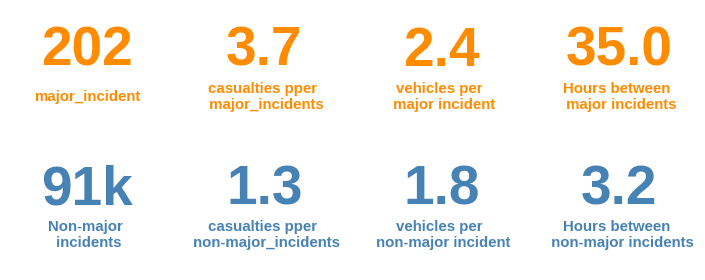

In [ ]:
# plot text value of the accidents statistics
plt.style.use('seaborn-white')

# create subplot
fig, ax = plt.subplots(2, 4, figsize = (10, 4))
ax = ax.ravel()
m = 0 

# plot
for value, text in zip(major_val, major_text):
  plot_stat(value, text, 'major', ax[m])
  m += 1
for value, text in zip(non_major_val, non_major_text):
  plot_stat(value, text, 'Non-major', ax[m])
  m += 1

     
